
[Decision Tree Classification Report]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

Accuracy (Decision Tree): 0.8000


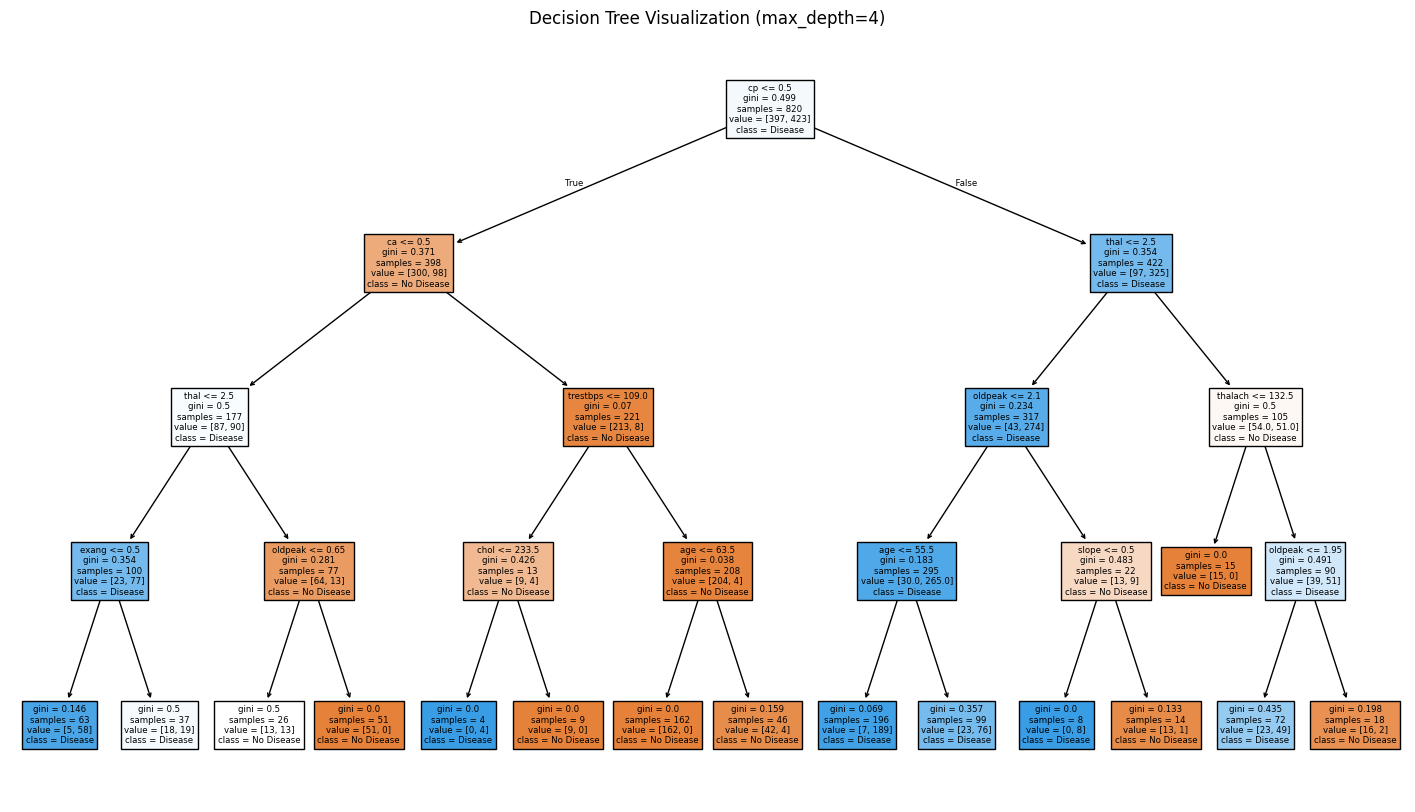


[Random Forest Classification Report]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Accuracy (Random Forest): 0.9854


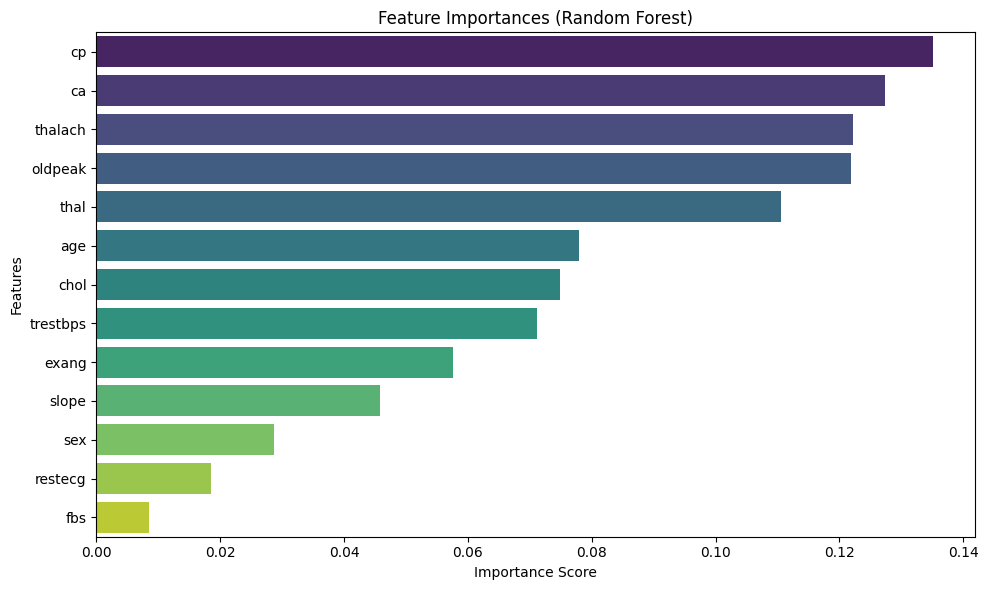

Cross-Validation Accuracy (Decision Tree): 0.8341
Cross-Validation Accuracy (Random Forest): 0.9971


In [4]:
# AI & ML Internship - Task 5: Decision Trees and Random Forests
# Objective: Classification using tree-based models on Heart Disease Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings

# Suppress future and user warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("heart.csv")

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# === 1. Decision Tree Classifier (controlled depth to reduce overfitting) ===
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation - Decision Tree
print("\n[Decision Tree Classification Report]")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy (Decision Tree): {accuracy_score(y_test, y_pred_dt):.4f}")

# Visualize Decision Tree
plt.figure(figsize=(18, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=["No Disease", "Disease"],
          filled=True)
plt.title("Decision Tree Visualization (max_depth=4)")
plt.show()

# === 2. Random Forest Classifier (Ensemble Model) ===
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation - Random Forest
print("\n[Random Forest Classification Report]")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy (Random Forest): {accuracy_score(y_test, y_pred_rf):.4f}")

# === 3. Feature Importance from Random Forest ===
importances = pd.Series(
    rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values,
            y=importances.index,
            palette="viridis")
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# === 4. Cross-Validation Accuracy ===
dt_cv_score = cross_val_score(dt_model, X, y, cv=5).mean()
rf_cv_score = cross_val_score(rf_model, X, y, cv=5).mean()

print(f"Cross-Validation Accuracy (Decision Tree): {dt_cv_score:.4f}")
print(f"Cross-Validation Accuracy (Random Forest): {rf_cv_score:.4f}")
